In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('data/final_dataframe.csv')
df.head()

,date,day,month,year,cases,deaths,country,country_code,countryterritoryCode,popData2018,coronavirus,related_queries,trends_title,trends_traffic,cumsum_case,growth_rate
0,2020-04-18,18,4,2020,36,4,Australia,AU,AUS,24992369.0,32,NaN,"{0: 'Mitch Cronin', 1: 'One World: Together at...","{0: '50K+', 1: '20K+', 2: '20K+', 3: '20K+', 4...",6533,0.551049
1,2020-04-17,17,4,2020,39,0,Australia,AU,AUS,24992369.0,41,NaN,"{0: 'Brian Dennehy', 1: 'Cassie Sainsbury', 2:...","{0: '50K+', 1: '20K+', 2: '20K+', 3: '20K+', 4...",6497,0.600277
2,2020-04-16,16,4,2020,42,2,Australia,AU,AUS,24992369.0,45,NaN,"{0: 'iPhone SE', 1: 'Brandi Glanville', 2: 'Ou...","{0: '100K+', 1: '20K+', 2: '20K+', 3: '10K+', ...",6458,0.650356
3,2020-04-15,15,4,2020,50,0,Australia,AU,AUS,24992369.0,46,NaN,"{0: 'P.E Nation', 1: 'Joe Biden', 2: 'Amy Schu...","{0: '50K+', 1: '20K+', 2: '10K+', 3: '10K+', 4...",6416,0.779302
4,2020-04-14,14,4,2020,44,0,Australia,AU,AUS,24992369.0,47,NaN,"{0: 'Compass', 1: 'Virgin Australia', 2: 'Goog...","{0: '50K+', 1: '20K+', 2: '20K+', 3: '20K+', 4...",6366,0.691172


In [3]:
countries = df['country'].unique()
countries

array(['Australia', 'Canada', 'Ireland', 'South_Africa', 'United_Kingdom',
       'United_States_of_America'], dtype=object)

In [ ]:
# Test for plotting all countries interest search 

Australia_search = df[df['country']==countries[0]]['coronavirus']
Canada_search = df[df['country']==countries[1]]['coronavirus']
x = df['date'].unique()


plt.figure(1,figsize=(17,6))
plt.plot(x, Australia_search)
plt.plot(x, Canada_search);

In [19]:
subdf = df[df['country']==countries[0]][::-1][['cases','deaths','coronavirus']]
subdf

,cases,deaths,coronavirus
109,0,0,0
108,0,0,0
107,0,0,0
106,0,0,0
105,0,0,0
...,...,...,...
4,44,0,47
3,50,0,46
2,42,2,45
1,39,0,41


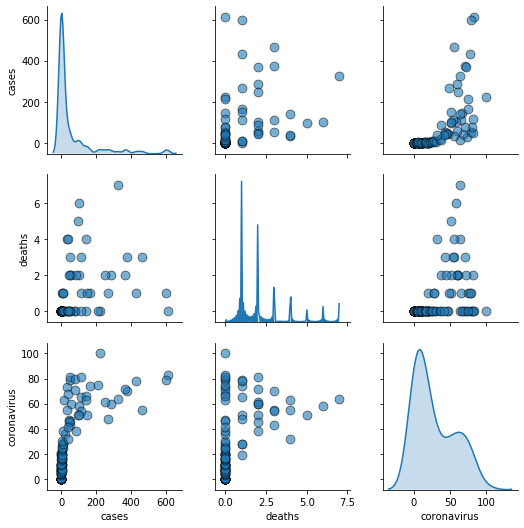

In [20]:
sns.pairplot(subdf, diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'})

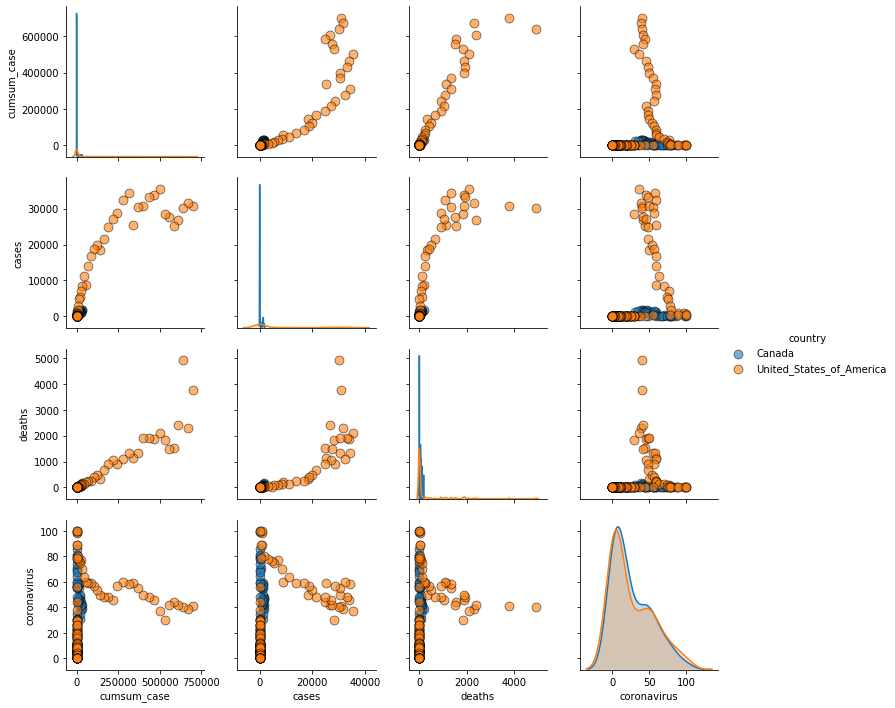

In [33]:
sns.pairplot(df[df['country'].isin(['United_States_of_America','Canada'])], vars = ['cumsum_case','cases','deaths','coronavirus'], hue='country',diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'})



In [39]:
df[(df['country']==countries[5])&(df['coronavirus']>70)][::-1][['date','cases','cumsum_case','deaths','coronavirus']]

,date,cases,cumsum_case,deaths,coronavirus
517,2020-03-12,287,1312,2,100
516,2020-03-13,351,1663,10,89
515,2020-03-14,511,2174,7,79
514,2020-03-15,777,2951,10,100
513,2020-03-16,823,3774,12,98
512,2020-03-17,887,4661,16,89
511,2020-03-18,1766,6427,23,80
510,2020-03-19,2988,9415,42,78
509,2020-03-20,4835,14250,0,76
508,2020-03-21,5374,19624,110,75


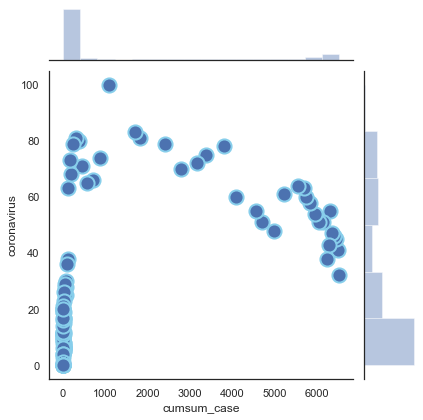

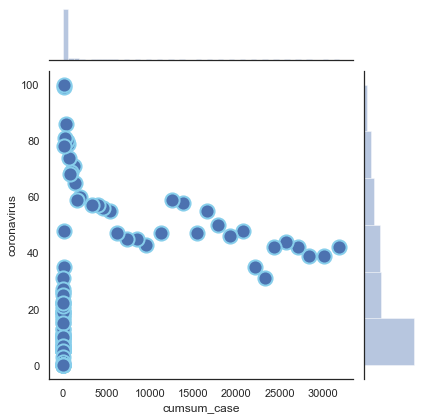

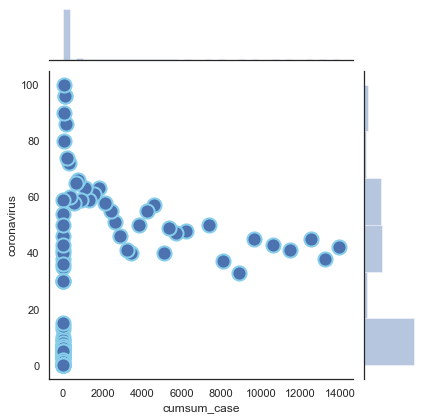

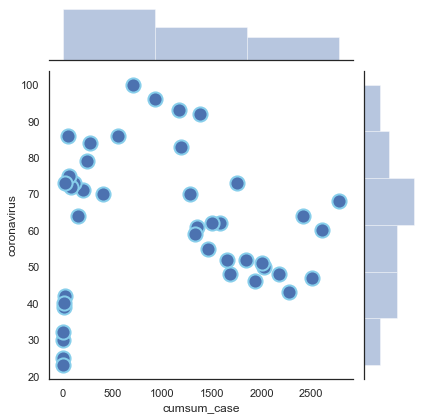

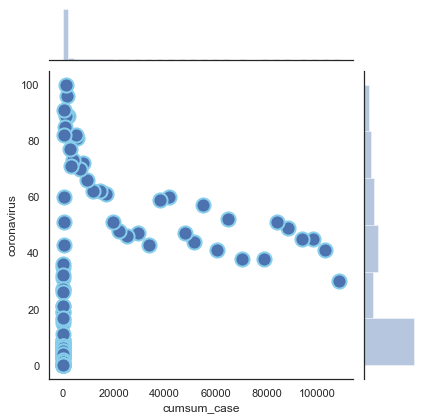

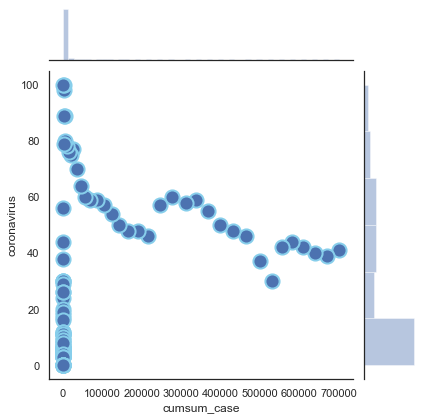

In [88]:
for i in range(len(countries)):
    sns.jointplot(x=df[df['country']==countries[i]].cumsum_case, y=df[df['country']==countries[i]].coronavirus, kind='scatter', color='b',s=200, edgecolor="skyblue", linewidth=2)
    
    

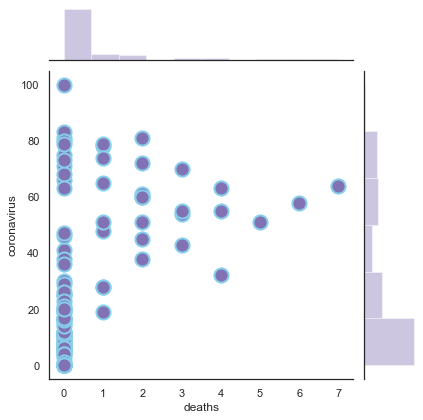

In [49]:
sns.jointplot(x=Australia.deaths, y=Australia.coronavirus, kind='scatter', s=200, color='m', edgecolor="skyblue", linewidth=2)



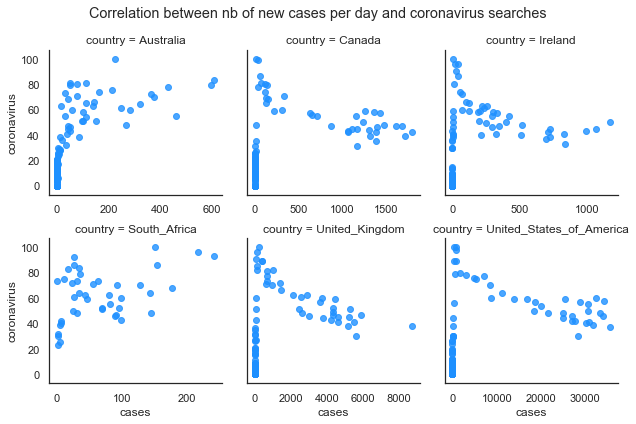

In [115]:
# Creating regplot per country to see the correlation between coronavirus searches and cases

g = sns.FacetGrid(df, col="country", col_wrap=3, margin_titles=True, sharex=False)
g.map(sns.regplot, "cases", "coronavirus", color='dodgerblue', fit_reg=False);
plt.subplots_adjust(top=.88)
g.fig.suptitle('Correlation between nb of new cases per day and coronavirus searches');

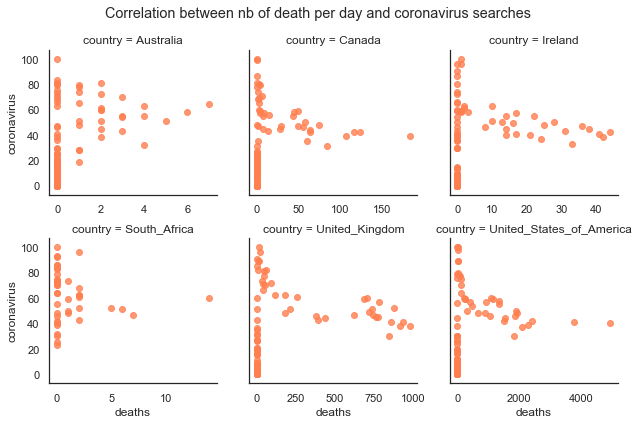

In [116]:
# Creating regplot per country to see the correlation between coronavirus searches and deaths

g = sns.FacetGrid(df, col="country", col_wrap=3, margin_titles=True, sharex=False)
g.map(sns.regplot, "deaths", "coronavirus", color='coral', fit_reg=False)
plt.subplots_adjust(top=0.88)
g.fig.suptitle('Correlation between nb of death per day and coronavirus searches');